In [1]:
import tensorflow as tf
from tensorflow.contrib import learn
import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
DATA_DIR = '/tmp/data' if not 'win32' in sys.platform else "c:\\tmp\\data"

In [4]:
data = input_data.read_data_sets(DATA_DIR, one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [8]:
x_data, y_data = data.train.images, data.train.labels.astype(np.int32)
x_test, y_test = data.test.images, data.test.labels.astype(np.int32)

In [17]:
NUM_STEPS = 2000
MINIBATCH_SIZE = 128

feature_columns = learn.infer_real_valued_columns_from_input(x_data)


In [51]:
NUM_STEPS = 2000
MINIBATCH_SIZE = 128

feature_columns = learn.infer_real_valued_columns_from_input(x_data)
print(feature_columns)

dnn = learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[200],
    n_classes=10,
    optimizer=tf.train.ProximalAdagradOptimizer(
    learning_rate=0.2)
    )

dnn.fit(x=x_data,y=y_data, steps=NUM_STEPS,
        batch_size=MINIBATCH_SIZE)

test_acc = dnn.evaluate(x=x_test,y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f57dd10da58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpjrpfy7h1'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO

In [25]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    plt.savefig('confusion_mat.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)

    
    plt.show()

x_test shape(10000, 784)
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpl2i5x_ql/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


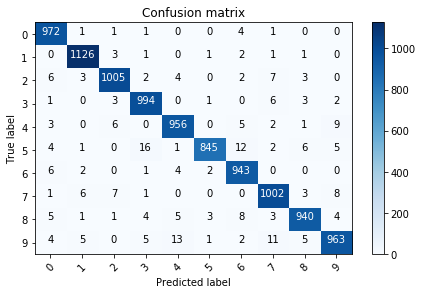

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

print('x_test shape{}'.format(x_test.shape))
y_pred = dnn.predict(x=x_test,as_iterable=False)
class_names = ['0','1','2','3','4','5','6','7','8','9']    
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, class_names)

In [42]:
import pandas as pd
N = 10000
weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9, 1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]

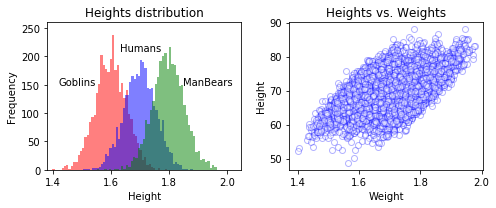

In [104]:
colors = ['r','b','g']
f,axarr = plt.subplots(1,2,figsize = [7,3])
ax = axarr[0]
for ii in range(3):
    ax.hist(height[spec_id == ii],50,color=colors[ii],alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Frequency')
    ax.set_title('Heights distribution')
# ax.legend(['Goblins','Humans','ManBears'],loc=2, shadow=True,prop={'size':6})
height = height + np.random.randn(N)*0.015
ax.text(1.42,150,'Goblins')
ax.text(1.63,210,'Humans')
ax.text(1.85,150,'ManBears')

ax.set_ylim([0,260])
ax.set_xlim([1.38,2.05])

df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})


ax = axarr[1]

ax.plot(df['Height'],df['Weight'],'o',alpha=0.3,mfc='w',mec='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Heights vs. Weights')
    
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight', format='png', dpi=300)

plt.show()

In [105]:
df.head()

,Species,Weight,Height
0,ManBears,76.574871,1.887418
1,Human,73.640052,1.746223
2,Human,72.394294,1.720267
3,Goblin,67.390519,1.555232
4,ManBears,76.333328,1.880070


In [106]:
from tensorflow.contrib import layers
Weight = layers.real_valued_column("Weight")
Species = layers.sparse_column_with_keys(column_name = "Species", keys=['Goblin','Human','ManBears'])
print('*'*100)
print(Weight)
print('*'*100)
print(Species)
print('*'*100)

reg = learn.LinearRegressor(feature_columns=[Weight, Species])
print('*'*100)
print(reg)

****************************************************************************************************
_RealValuedColumn(column_name='Weight', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)
****************************************************************************************************
_SparseColumnKeys(column_name='Species', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Goblin', 'Human', 'ManBears'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string)
****************************************************************************************************
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f57b3df8908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master

In [136]:
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    
    feature_cols['Species'] =  tf.SparseTensor(indices=[[i, 0] for i in range(df['Species'].size)],
                                               values=df['Species'].values,
                                               dense_shape=[df['Species'].size, 1])
                    
    labels = tf.constant(df['Height'].values)

    return feature_cols, labels


In [138]:
reg.fit(input_fn=lambda:input_fn(df), steps=500)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv9qv8r_u/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpv9qv8r_u/model.ckpt.
INFO:tensorflow:loss = 2.896765, step = 1
INFO:tensorflow:global_step/sec: 237.255
INFO:tensorflow:loss = 0.0055037704, step = 101 (0.424 sec)
INFO:tensorflow:global_step/sec: 315.455
INFO:tensorflow:loss = 0.0050675585, step = 201 (0.317 sec)
INFO:tensorflow:global_step/sec: 318.787
INFO:tensorflow:loss = 0.0049220305, step = 301 (0.314 sec)
INFO:tensorflow:global_step/sec: 313.312
INFO:tensorflow:loss = 0.0047931084, step = 401 (0.319 sec)
INFO:tensorflow:Saving checkpoints for 500 into /tmp/tmpv9qv8r_u/model.ckpt.
INFO:tensorflow:Loss for final step: 0.004669837.


LinearRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f57b3df84a8>, 'feature_columns': [_RealValuedColumn(column_name='Weight', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _SparseColumnKeys(column_name='Species', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Goblin', 'Human', 'ManBears'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [160]:
w_w = reg.get_variable_value('linear/Weight/weight')
print('Estimation for Weight: {}'.format(w_w))

s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print('Estimation for Species: {}'.format(s_w + b))

c = reg.get_variable_names()
print(c)

Estimation for Weight: [[0.02265642]]
Estimation for Species: [[0.01024192]
 [0.11010086]
 [0.2119315 ]]
['global_step', 'linear/Species/weights', 'linear/Species/weights/Species/weights/part_0/Ftrl', 'linear/Species/weights/Species/weights/part_0/Ftrl_1', 'linear/Weight/weight', 'linear/Weight/weight/r/Weight/weight/part_0/Ftrl', 'linear/Weight/weight/r/Weight/weight/part_0/Ftrl_1', 'linear/bias_weight', 'linear/bias_weight/ear/bias_weight/part_0/Ftrl', 'linear/bias_weight/ear/bias_weight/part_0/Ftrl_1']
